# **Návrh riešenia využívajúceho umelú inteligenciu vo forme transformera – RealLife Translator**

## **1. Princíp aplikácie**

Navrhované riešenie pracuje za použitia 3 hlavných princípov. Tieto princípy sú uplatňované a zodpovedajú 3 hlavným fázam, na ktorých je postavené celé riešenie. Výstup z každej fáze je v už použiteľnej podobe, to znamená, že nie je nutné brať naše riešenie ako celok, ale možno ho rozkúskovať na viacero jednoduchších úloh.

Všetky nižšie uvedené modely budú implementované do prostredia mobilnej alebo počítačovej aplikácie, prostredníctvom ktorej bude celé riešenie realizované.

Na počiatku celého procesu je potrebné aby užívateľ dodal vizuálny záznam, ktorý vstupuje do prvej fáze riešenia. Tento záznam vo forme fotky alebo obrázka môže byť do aplikácie dodaný prostredníctvom importu alebo odfotografovania.

Prvý princíp, ktorý je využívaný je ***Image-to-Text***. Tento princíp je využívaný v prvej fáze, kde dochádza k identifikácii objektu z poskytnutého záznamu. 

Neskôr v druhej fáze je uplatňovaný princíp ***Translate Text***, pričom táto fáza je voliteľná. V tomto kroku má užívateľ možnosť vygenerovaný text z predošlej fáze preložiť do zvoleného jazyka.

A tretí princíp čo je ***Text-to-Speech*** je úzko spätý s treťou fázou. V tejto fáze dochádza k vysloveniu textu, či už preloženého alebo nepreloženého, na základe toho či bol zvolený preklad v predchádzajúcej fáze.

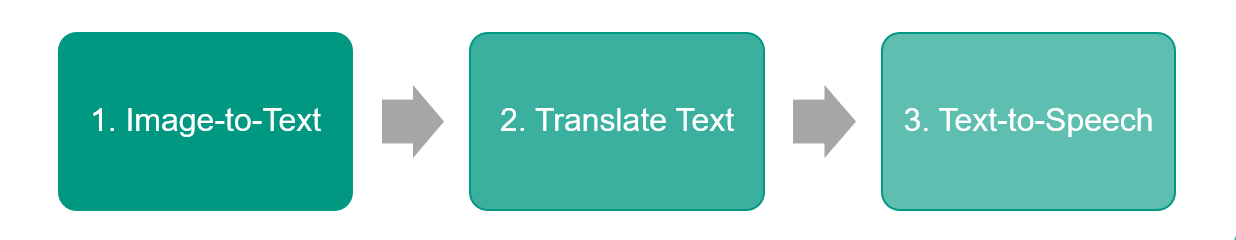

Obrázok 1: *Schéma postupnosti fází riešenia*

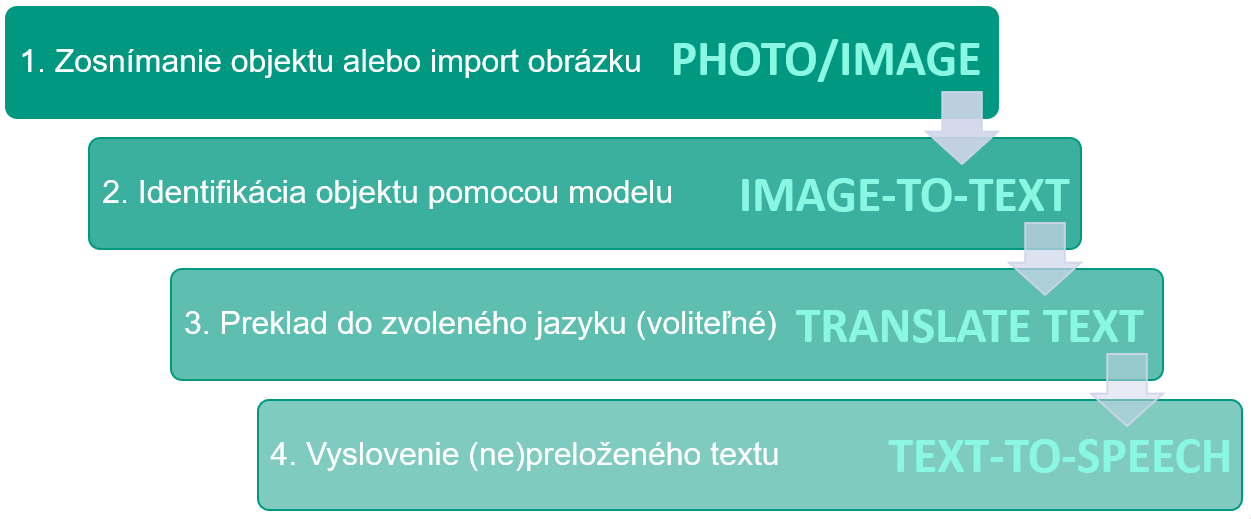

Obrázok 2: *Dekompozícia riešenia na jednoduchšie úlohy*

## **2. Technické spracovanie riešenia**

### **2.1 Image-to-Text**

Pomocou modelu založeného na princípe ***Image-to-Text*** je systém schopný rozpoznať objekty nachádzajúce sa na poskytnutom obrázku. Obrázok môže byť dodaný prostredníctvom importu, avšak väčší potenciál má možnosť zosnímať objekty prostredníctvom vizuálneho zariadenia ako môže byť napríklad fotoaparát mobilného telefónu, čo je dnes pokladané za súčasť vybavenia každého človeka. 

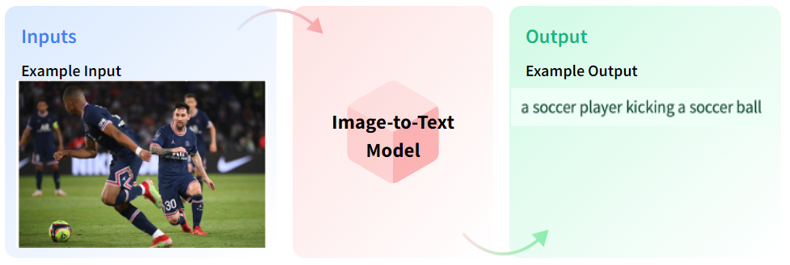

Obrázok 3: *Popis princípu Image-to-Text*

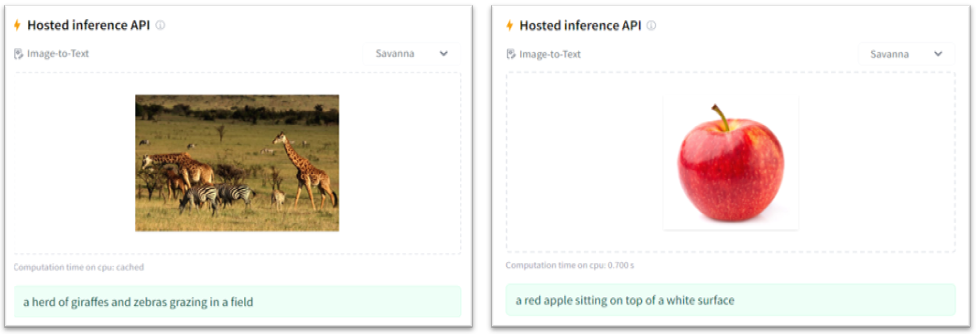

Obrázok 4: *Ďalšie príklady použitia princípu Image-to-Text*

Model, za ktorého použitia bol vypracovaný proces identifikácie objektov z obrázka alebo fotografie, bol čerpaný z portálu **Hugging Face** a to konkrétne **nlpconnect/vit-gpt2-image-captioning**. Tento model je dostupný na odkaze https://huggingface.co/nlpconnect/vit-gpt2-image-captioning.

**2.1.1 Inštalácia balíčkov**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**2.1.2 Trénovanie modelu**

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

**2.1.3 Stiahnutie obrázka z internetu**

In [ ]:
!rm our_image.png #zmazanie obrázku ak tam ostal

!wget -O our_image.png https://i.picsum.photos/id/338/200/300.jpg?hmac=rE5P3WDLKY1VMpd9y_FLo_OKhTzG4_3zCbGjKvgOL5w #stiahnutie obrázku

rm: cannot remove 'our_image.png': No such file or directory
--2023-01-22 11:42:45--  https://i.picsum.photos/id/338/200/300.jpg?hmac=rE5P3WDLKY1VMpd9y_FLo_OKhTzG4_3zCbGjKvgOL5w
Resolving i.picsum.photos (i.picsum.photos)... 172.67.74.163, 104.26.5.30, 104.26.4.30, ...
Connecting to i.picsum.photos (i.picsum.photos)|172.67.74.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5992 (5.9K) [image/jpeg]
Saving to: ‘our_image.png’

our_image.png       100%[===================>]   5.85K  --.-KB/s    in 0s      

2023-01-22 11:42:45 (62.6 MB/s) - ‘our_image.png’ saved [5992/5992]



**2.1.4 Predikcia**

In [ ]:
prediction = predict_step(["our_image.png"])
prediction

['a man standing on a beach next to the ocean']

**2.1.5 Vymazanie obrázka**

In [ ]:
!rm our_image.png

### **2.2 Translate Text**

Pomocou modelu založeného na princípe ***Translate Text*** (Text-to-Text) systém preloží vygenerovaný text do zvoleného jazyka. Ako už bolo uvedené v kapitole 1, táto funkcia je voliteľná, to znamená, že používateľ môže s výstupom z predošlej fáze pracovať ďalej či už v jeho štandardnej nepreloženej podobe, tak aj v tej preloženej.

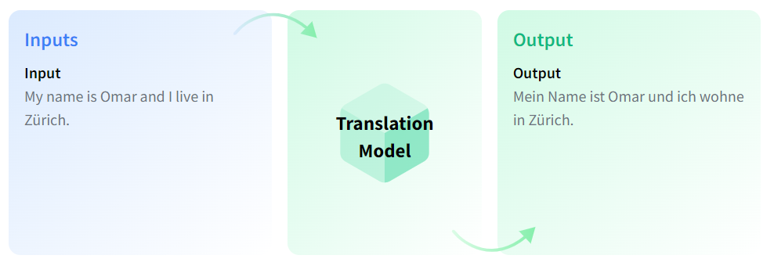

Obrázok 5: *Popis princípu Translate Text*

Pre preklad textu do zvoleného jazyka bolo taktiež ako v predošlom kroku čerpané z portálu **Hugging Face** a to konkrétne použitím modelu **t5-small**. Tento model je dostupný na odkaze https://huggingface.co/t5-small.

In [ ]:
from transformers import (
    T5ForConditionalGeneration,
    T5TokenizerFast as T5Tokenizer,
    MT5TokenizerFast as MT5Tokenizer,
    LongT5ForConditionalGeneration,
    AutoTokenizer,
    MT5ForConditionalGeneration,
)
import torch
import time 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

input_ids = tokenizer("translate English to French: This subject is wonderful.", return_tensors="pt").input_ids
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Ce sujet est merveilleux.


### **2.3 Text-to-Speech**

Pomocou modelu založeného na princípe ***Text-to-Speech*** systém vygenerovaný text z predošlej fáze vysloví. Zvolenému jazyku sa tiež prisôsobí aj samotná výslovnosť. 

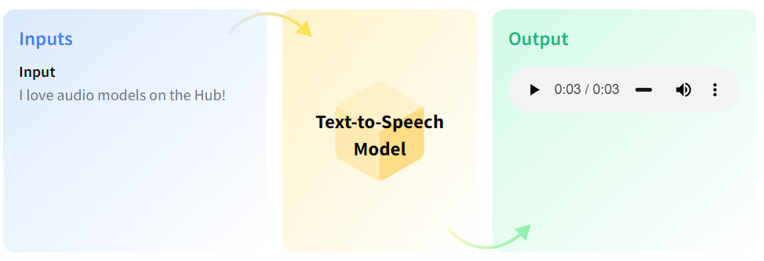

Obrázok 6: *Popis princípu Text-to-Speech*

Proces vyslovenia textu v preloženej, respektíve v nepreloženj podobe pracuje na základe modelu inšpirovaného modelom pochádzajúceho z portálu **Hugging Face**. Model nesie označenie **espnet/kan-bayashi_ljspeech_vits** a možno ho nájsť pod odkazom https://huggingface.co/espnet/kan-bayashi_ljspeech_vits.

**2.3.1 Inštalácia balíčkov**

In [ ]:
!pip install -q espnet==0.10.6 pyopenjtalk==0.2 pypinyin==0.44.0 parallel_wavegan==0.5.4 gdown==4.4.0 espnet_model_zoo

**2.3.2 Výber jazyka**

In [ ]:
#@title Choose English model { run: "auto" }
lang = 'English'
tag = 'kan-bayashi/ljspeech_fastspeech2' #@param ["kan-bayashi/ljspeech_tacotron2", "kan-bayashi/ljspeech_fastspeech", "kan-bayashi/ljspeech_fastspeech2", "kan-bayashi/ljspeech_conformer_fastspeech2", "kan-bayashi/ljspeech_joint_finetune_conformer_fastspeech2_hifigan", "kan-bayashi/ljspeech_joint_train_conformer_fastspeech2_hifigan", "kan-bayashi/ljspeech_vits"] {type:"string"}
vocoder_tag = "none" #@param ["none", "parallel_wavegan/ljspeech_parallel_wavegan.v1", "parallel_wavegan/ljspeech_full_band_melgan.v2", "parallel_wavegan/ljspeech_multi_band_melgan.v2", "parallel_wavegan/ljspeech_hifigan.v1", "parallel_wavegan/ljspeech_style_melgan.v1"] {type:"string"}

In [ ]:
#@title Choose Japanese model { run: "auto" }
lang = 'Japanese'
tag = 'kan-bayashi/jsut_full_band_vits_prosody' #@param ["kan-bayashi/jsut_tacotron2", "kan-bayashi/jsut_transformer", "kan-bayashi/jsut_fastspeech", "kan-bayashi/jsut_fastspeech2", "kan-bayashi/jsut_conformer_fastspeech2", "kan-bayashi/jsut_conformer_fastspeech2_accent", "kan-bayashi/jsut_conformer_fastspeech2_accent_with_pause", "kan-bayashi/jsut_vits_accent_with_pause", "kan-bayashi/jsut_full_band_vits_accent_with_pause", "kan-bayashi/jsut_tacotron2_prosody", "kan-bayashi/jsut_transformer_prosody", "kan-bayashi/jsut_conformer_fastspeech2_tacotron2_prosody", "kan-bayashi/jsut_vits_prosody", "kan-bayashi/jsut_full_band_vits_prosody", "kan-bayashi/jvs_jvs010_vits_prosody", "kan-bayashi/tsukuyomi_full_band_vits_prosody"] {type:"string"}
vocoder_tag = 'none' #@param ["none", "parallel_wavegan/jsut_parallel_wavegan.v1", "parallel_wavegan/jsut_multi_band_melgan.v2", "parallel_wavegan/jsut_style_melgan.v1", "parallel_wavegan/jsut_hifigan.v1"] {type:"string"}

**2.3.3 Model Setup**

In [ ]:
from espnet2.bin.tts_inference import Text2Speech
from espnet2.utils.types import str_or_none
device_test = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#print(device_test)
text2speech = Text2Speech.from_pretrained(
    model_tag=str_or_none(tag),
    vocoder_tag=str_or_none(vocoder_tag),
    device=str(device_test),
    # Only for Tacotron 2 & Transformer
    threshold=0.5,
    # Only for Tacotron 2
    minlenratio=0.0,
    maxlenratio=10.0,
    use_att_constraint=False,
    backward_window=1,
    forward_window=3,
    # Only for FastSpeech & FastSpeech2 & VITS
    speed_control_alpha=1.0,
    # Only for VITS
    noise_scale=0.333,
    noise_scale_dur=0.333,
)

**2.3.4 Synthesis**

In [ ]:
import time
import torch

# decide the input sentence by yourself
#print(f"Input your favorite sentence in {lang}.")
#x = input()
x = prediction[0]

# synthesis
with torch.no_grad():
    start = time.time()
    wav = text2speech(x)["wav"]
rtf = (time.time() - start) / (len(wav) / text2speech.fs)
#print(f"RTF = {rtf:5f}")

# let us listen to generated samples
from IPython.display import display, Audio
display(Audio(wav.view(-1).cpu().numpy(), rate=text2speech.fs))